# Dimensionality Reduction

## What is Dimensionality Reduction

#### The number of input variables or features for a dataset is referred to as its dimensionality. Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset. More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality.High-dimensionality statistics and dimensionality reduction techniques are often used for data visualization. Nevertheless these techniques can be used in applied machine learning to simplify a classification or regression dataset in order to better fit a predictive model.

## Problem With Many Input Variables

#### Having a large number of dimensions in the feature space can mean that the volume of that space is very large, and in turn, the points that we have in that space (rows of data) often represent a small and non-representative sample. This can dramatically impact the performance of machine learning algorithms fit on data with many input features, generally referred to as the curse of dimensionality. Therefore, it is often desirable to reduce the number of input features. This reduces the number of dimensions of the feature space, hence the name dimensionality reduction.

#### A model with too many degrees of freedom is likely to overfit the training dataset and therefore may not perform well on new data. It is desirable to have simple models that generalize well, and in turn, input data with few input variables. This is particularly true for linear models where the number of inputs and the degrees of freedom of the model are often closely related.

### evaluate lda with naive bayes algorithm for classification

In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    random_state=7, n_classes=10)
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=5)), ('m', GaussianNB())] 
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.314 (0.049)


### Compare lda number of components with naive bayes algorithm for classification

>1 0.182 (0.032)
>2 0.235 (0.036)
>3 0.267 (0.038)
>4 0.303 (0.037)
>5 0.314 (0.049)
>6 0.314 (0.040)
>7 0.329 (0.042)
>8 0.343 (0.045)
>9 0.358 (0.056)


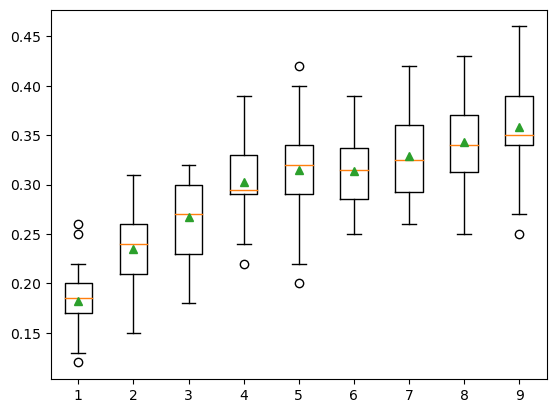

In [2]:


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
      n_redundant=5, random_state=7, n_classes=10)
  return X, y

def get_models():
  models = dict()
  for i in range(1,10):
    steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
    models[str(i)] = Pipeline(steps=steps)
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
  return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [3]:

# make predictions using lda with naive bayes
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    random_state=7, n_classes=10)
# define the model
steps = [('lda', LinearDiscriminantAnalysis(n_components=9)), ('m', GaussianNB())] 
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[2.3548775, -1.69674567, 1.6193882, -1.19668862, -2.85422348, -2.00998376,
    16.56128782, 2.57257575, 9.93779782, 0.43415008, 6.08274911, 2.12689336, 1.70100279,
    3.32160983, 13.02048541, -3.05034488, 2.06346747, -3.33390362, 2.45147541, -1.23455205]]
yhat = model.predict(row) 
print('Predicted Class: %d' % yhat[0])

Predicted Class: 6


## How to Perform PCA Dimensionality Reduction